#Taller Numero 3, Análisis Bivariado

El objetivo de este taller es utilizar los datos de un dataset previamente seleccionado y realizar un estudio centrado en las dos columnas más relevantes del mismo. A partir de este análisis, se deben extraer conclusiones significativas basadas en la relación entre estas dos variables.

In [97]:
#Lo primero que se debe hacer es importar la libreria pandas para poder leer el archivo excel
import pandas as pd
#Se debe especificar la ruta del archivo excel, en este caso se encuentra en la carpeta del proyecto
file_path = 'C:\\Users\\accc_\\ICESI\\Analisis exploratorio\\Tareas-Analisis-Exploratorio\\Tareas-Analisis-Exploratorio\\Taller 3\\Datos laboratorio Fisica de Suelos.xlsx'
#Se crea el dataframe con la funcion read_excel, se especifica el nombre de la hoja que se quiere leer
df=pd.read_excel(file_path, sheet_name='Lista')
df


,No.,Tiempo,Temperatura°C,Humedad%
0,1,2024-03-22 09:50:41,"27,5","49,6"
1,2,2024-03-22 10:50:41,"24,1","52,2"
2,3,2024-03-22 11:50:41,"24,7","51,8"
3,4,2024-03-22 12:50:41,"24,9","49,8"
4,5,2024-03-22 13:50:41,"24,8","48,3"
...,...,...,...,...
3333,3334,2024-08-08 06:50:41,"28,5","70,8"
3334,3335,2024-08-08 07:50:41,"28,7","72,8"
3335,3336,2024-08-08 08:50:41,"23,7","61,2"
3336,3337,2024-08-08 09:50:41,"24,0","55,3"


Como se puede observar, la columna de tiempo (que se utilizará como referencia para la variación de los datos) contiene dos elementos: el día en que se tomaron los datos y la hora exacta. Dado que este formato puede complicar el análisis computacional, los datos se han separado en dos columnas adicionales: una denominada "Fecha" y otra denominada "Hora".

In [114]:
# Asegúrate de que la columna 'Tiempo' esté en formato datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])

# Asegurarte de que los valores de las columnas numéricas estén correctamente formateados
df['Temperatura°C'] = df['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)
df['Humedad%'] = df['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# Extraer solo la fecha de la columna 'Tiempo'
df['Fecha'] = df['Tiempo'].dt.date
df['Hora'] = df['Tiempo'].dt.strftime('%H:%M')

df

,No.,Tiempo,Temperatura°C,Humedad%,Fecha,Hora
0,1,2024-03-22 09:50:41,27.5,49.6,2024-03-22,09:50
1,2,2024-03-22 10:50:41,24.1,52.2,2024-03-22,10:50
2,3,2024-03-22 11:50:41,24.7,51.8,2024-03-22,11:50
3,4,2024-03-22 12:50:41,24.9,49.8,2024-03-22,12:50
4,5,2024-03-22 13:50:41,24.8,48.3,2024-03-22,13:50
...,...,...,...,...,...,...
3333,3334,2024-08-08 06:50:41,28.5,70.8,2024-08-08,06:50
3334,3335,2024-08-08 07:50:41,28.7,72.8,2024-08-08,07:50
3335,3336,2024-08-08 08:50:41,23.7,61.2,2024-08-08,08:50
3336,3337,2024-08-08 09:50:41,24.0,55.3,2024-08-08,09:50


Dado a que se busca analizar una tendencia de los datos de las columnas, se simplificó las columnas para que los datos reflejaran el promedio de los datos diariamente, las lineas rojas señalan la medida ideal de humedad (50%) y temperatura (25°C).

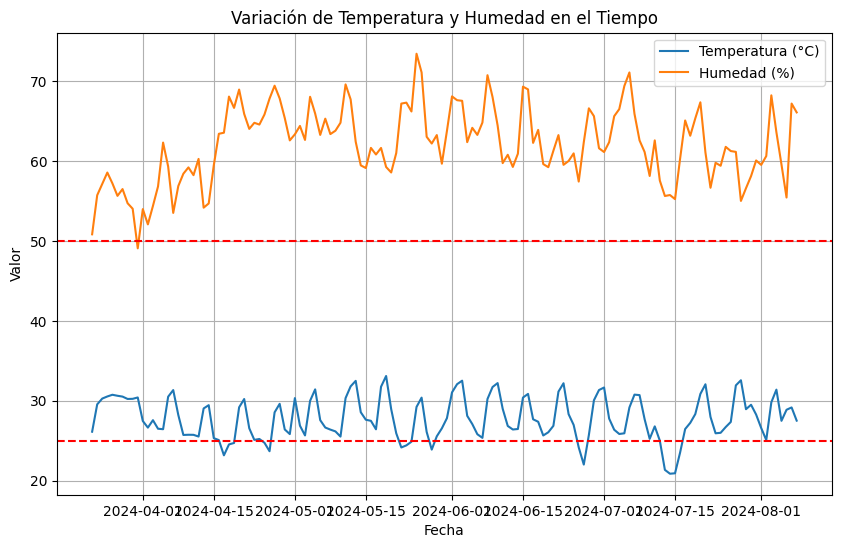

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'data' cargado con las columnas 'Tiempo', 'Humedad%', y 'Temperatura°C'
# Asegúrate de que la columna 'Tiempo' esté en formato datetime
daily_data['Fecha'] = pd.to_datetime(daily_data['Tiempo'])

# Resamplear los datos para obtener promedios diarios
data_resampled = daily_data.resample('D', on='Tiempo').mean()

# Graficar las series de tiempo
plt.figure(figsize=(10, 6))
plt.plot(data_resampled.index, data_resampled['Temperatura°C'], label='Temperatura (°C)')
plt.plot(data_resampled.index, data_resampled['Humedad%'], label='Humedad (%)')

# Configurar el gráfico
plt.title('Variación de Temperatura y Humedad en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.axhline(y=25, color='red', linestyle='--')
plt.axhline(y=50, color='red', linestyle='--')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


Los datos en tendencia mensual revelan una variación más discreta en comparación de la tendencia diaria, si bien los rangos tambien demuestran una distancia a los datos ideales que el laboratorio debería obtener.

C:\Users\accc_\AppData\Local\Temp\ipykernel_5300\1947232162.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = daily_data.resample('M', on='Tiempo').mean()


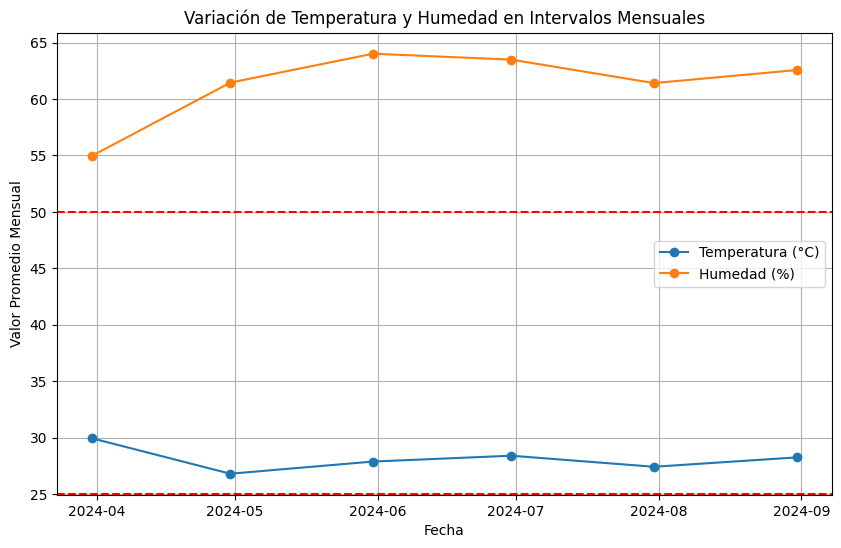

In [86]:
# Asegúrate de que la columna 'Tiempo' esté en formato datetime
daily_data['Tiempo'] = pd.to_datetime(daily_data['Tiempo'])

# Resamplear los datos para obtener promedios mensuales
data_resampled = daily_data.resample('M', on='Tiempo').mean()

# Graficar las series de tiempo
plt.figure(figsize=(10, 6))
plt.plot(data_resampled.index, data_resampled['Temperatura°C'], label='Temperatura (°C)', marker='o')
plt.plot(data_resampled.index, data_resampled['Humedad%'], label='Humedad (%)', marker='o')

# Configurar el gráfico
plt.title('Variación de Temperatura y Humedad en Intervalos Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio Mensual')
plt.axhline(y=25, color='red', linestyle='--')
plt.axhline(y=50, color='red', linestyle='--')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Conclusiones:

Aunque los datos del estudio sugieren que el laboratorio podría estar fuera del margen ideal para garantizar la preservación eficaz de las muestras, es importante considerar que los cálculos utilizados para la graficación se basaron en promedios diarios o mensuales. Se requiere un análisis más exhaustivo de los datos, considerando las horas específicas y la climatología. Por lo tanto, es necesario continuar analizando la información.